<a href="https://colab.research.google.com/github/Dannexdandy/Dannexdandy/blob/main/Copy_of_Question5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Question5.csv',encoding = 'unicode_escape', engine ='python')
df

,track_name,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,More Love In The Ghetto,NaN,NaN,NaN,NaN,NaN,NaN
1,Hotel Blues,NaN,NaN,NaN,NaN,NaN,NaN
2,Del Siglo XXI a Washington,NaN,NaN,NaN,NaN,NaN,NaN
3,S.O.S.,NaN,NaN,NaN,NaN,NaN,NaN
4,Tera Yaar Bolda,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2994,Rudrashtakam (Shiva Stuti),NaN,NaN,NaN,NaN,NaN,NaN
2995,Buvons,NaN,NaN,NaN,NaN,NaN,NaN
2996,ÈÌ_âta rzeka,NaN,NaN,NaN,NaN,NaN,NaN
2997,Disappear - Demo,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(df.iloc[:, 1:7], inplace=True, axis=1)

In [ ]:
df


,track_name
0,More Love In The Ghetto
1,Hotel Blues
2,Del Siglo XXI a Washington
3,S.O.S.
4,Tera Yaar Bolda
...,...
2994,Rudrashtakam (Shiva Stuti)
2995,Buvons
2996,ÈÌ_âta rzeka
2997,Disappear - Demo


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

track_names =  df.track_name.str.cat(sep=' ')
track_names

'More Love In The Ghetto Hotel Blues Del Siglo XXI a Washington S.O.S. Tera Yaar Bolda Wasteland - Commentary Shakin\' She Takes More Than She Gives Blind Night Errand Can\'t Relate Christmas For Cowboys Astral Hop Up! My Ladies Rari Ba! (feat. Abidaz, Marshall Arts & C.U.P.) Aurora - Ilcobra Remix Jump Jump - Twerk Mix Something Good Damn Straight Come Thru International Put It On Wax Calm & Silent Und wenn ich trÌ_um Crackin\' Your Ribs [Mix Cut] In the Still of the Night Mi Familia (Si Toco la Trompeta) Them Bomb (We Like to Party) Balanced Voices - O sacrum convivium See Me, Feel Me (reprise)/Listening to You (reprise) Easy Tonight Summertime (feat. Jelly Roll) Ven a JesÌ¼s Sola Con Mi Soledad I Roll DÌÁmelo Ya Satisfaction This Is What She Calls Home Icon Love Mix Quebraditas: Traca Que Traca / Popotitos / El Apagon Major Cities Never Found a Girl I\'m Comin\' Gameface (feat. Kb & Soul Glow Activator) Idilio No Passa Passa Fading Like A Flower - Radio Edit Railroad Corral Santa Mo

In [ ]:
#convert the text to lower case for preprocessing
track_names = track_names.lower()

In [ ]:
#word_tokenization
import nltk
nltk.download('punkt')
words=nltk.word_tokenize(track_names)

In [ ]:
#stopword removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

filtered_words = []

for w in words:
  if w not in stop_words:
    filtered_words.append(w)

print('\n with stop words:', words)
print('\n After removing stop words:', filtered_words)



In [ ]:
#Finding the frequency distribution of words
frequency_dist = nltk.FreqDist(filtered_words)

In [ ]:
#Sorting the frequency distribution of words
sorted(frequency_dist, key=frequency_dist.__getitem__,reverse=True)[0:30]

In [ ]:
#Keeping only large words(more than three characters)
large_words= dict([(k,v) for k,v in frequency_dist.items() if len (k)>3])

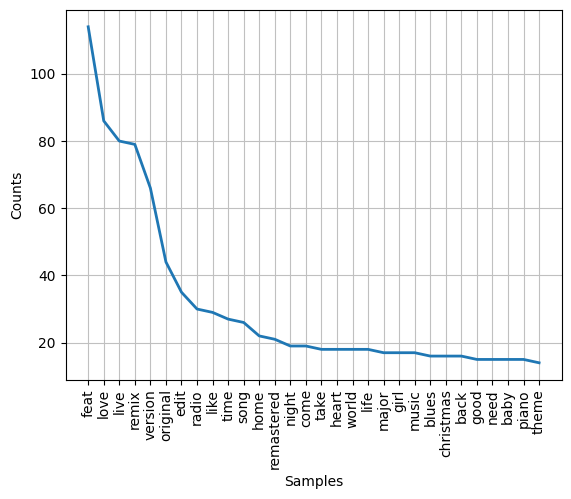

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Visualizing the distrbution using nltk and plot()
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(30,cumulative=False)

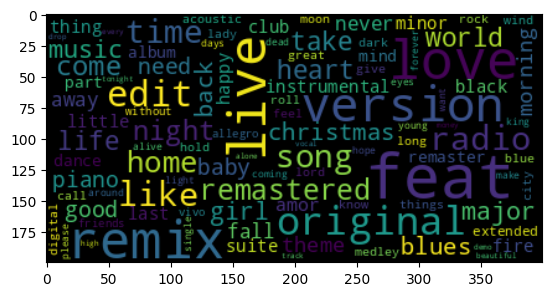

In [ ]:
#Visualizing the distribution of words using matplotlib and wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='black').generate_from_frequencies(frequency_dist)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")